In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm
import os

In [2]:
cwd = os.getcwd()
output_dir = os.path.join(cwd, "../data")
df = pd.read_csv(os.path.join(output_dir, "combined_csv.csv"))
#df_test = pd.read_csv(os.path.join(output_dir, "figlet1599056546.006096_1599063766.431225.csv"))
df = df.drop(df[df.responsetime > 3].index)
df.head()

,Time,cpu,diskio,diskioRead,diskioWritten,mem,networkReceived,networkTransmitted,replica,requests,responsetime,totalcpu,totalcpuUtilization,totalmemory,totalmemoryUtilization
0,2020-09-16 15:01:48.579,0.394346,0.000089,0.0,38411.377778,0.022388,26840.822222,66951.888889,1.0,798.0,0.108064,12.0,6.736111,5.045532e+10,10.103324
1,2020-09-16 15:02:03.579,0.496422,0.000089,0.0,33405.155556,0.022388,31241.511111,82299.555556,1.0,1219.0,0.108776,12.0,6.736111,5.045532e+10,10.103324
2,2020-09-16 15:02:18.579,0.869166,0.000000,0.0,27397.688889,0.023329,39810.866667,100951.511111,1.0,1671.0,0.104263,12.0,6.291667,5.045532e+10,10.044898
3,2020-09-16 15:02:33.579,0.922940,0.000000,0.0,20571.022222,0.023329,44105.977778,101001.488889,1.0,2150.0,0.108428,12.0,6.291667,5.045532e+10,10.044898
4,2020-09-16 15:02:48.579,1.396847,0.000000,0.0,10922.666667,0.023186,54213.222222,108081.866667,1.0,2672.0,0.105191,12.0,6.911111,5.045532e+10,10.035144


In [3]:
X = ['cpu', 'mem', 'replica', 'requests', 'totalcpu']
Y = ['responsetime']
len(df)

2737

In [4]:
#train = df[:(int((len(df)*0.8)))]
#test = df[(int((len(df)*0.8))):]
#len(test)

            cpu       mem  replica  requests  totalcpu   totalmemory  \
3778  26.882570  1.495767     50.0   51028.0      12.0  5.045532e+10   
3794  27.239806  1.521337     50.0   52728.0      12.0  5.045532e+10   
3795  22.608118  1.515341     50.0   52253.0      12.0  5.045532e+10   
3820  25.977692  1.514208     50.0   54403.0      12.0  5.045532e+10   
3821  26.866170  1.515055     50.0   54192.0      12.0  5.045532e+10   

      totalcpuUtilization  totalmemoryUtilization  
3778            70.321177               12.507730  
3794            73.096421               12.477665  
3795            72.482532               12.499876  
3820            73.099427               12.521369  
3821            73.259253               12.503712  
[[7.81574914e-12 4.43709472e-13 1.98195145e-11 ... 1.00000000e+00
  1.33506452e-10 2.00242971e-10]
 [9.83883972e-12 4.43709472e-13 1.98195145e-11 ... 1.00000000e+00
  1.33506452e-10 2.00242971e-10]
 [1.72264543e-11 4.62374567e-13 1.98195145e-11 ... 1.0000

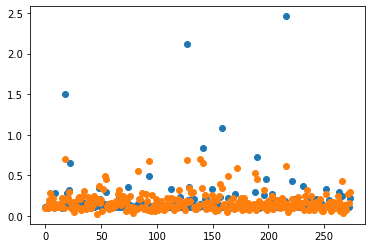

In [5]:
# Modeling:
# Using sklearn package to model data :
from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy
numpy.random.seed(7)
classifiers = [
    #svm.SVR(),
    #linear_model.SGDRegressor(),
    #linear_model.BayesianRidge(),
    #linear_model.LassoLars(),
    #linear_model.ARDRegression(), # parameters to avoid negative values 
    #linear_model.PassiveAggressiveRegressor(),
    linear_model.LinearRegression()
]
X = df[['cpu', 'mem', 'replica', 'requests', 'totalcpu', 'totalmemory','totalcpuUtilization', 'totalmemoryUtilization']]
print(X.tail())
X_normalized = preprocessing.normalize(X, norm='l2')
print(X_normalized)
train_x, test_x, train_y, test_y = np.asarray(train_test_split(X, df['responsetime'], test_size=0.1))
for item in classifiers:
    print(item)
    regr = item
    #train_x = preprocessing.normalize(train_x, norm='l2')
    regr.fit(train_x,train_y)
    #test_x = preprocessing.normalize(test_x, norm='l2')
    #Now let’s do prediction of data:
    Y_pred = regr.predict(test_x)
    #print(Y_pred)
    # Check accuracy:
    from sklearn.metrics import r2_score
    R = r2_score(test_y , Y_pred)
    print ('R² :',R)
    plt.scatter(range(0,len(test_y)),test_y)
    plt.scatter(range(0,len(Y_pred)),Y_pred)
    plt.show()

In [6]:
#test_x = np.array(test[X])
#test_y = np.array(test[Y])
# The coefficients:
#print("coefficients : ",regr.coef_) #Slope
#print("Intercept : ",regr.intercept_) #Intercept
#coeff_data = pd.DataFrame(regr.coef_ , X , columns=['Coefficients'])
#coeff_data

In [7]:
#Now let’s do prediction of data:
#Y_pred = regr.predict(test_x)
# Check accuracy:
#from sklearn.metrics import r2_score
#R = r2_score(test_y , Y_pred)
#print ('R² :',R)
#plt.scatter(range(0,len(test_y)),test_y)
#plt.scatter(range(0,len(Y_pred)),Y_pred)

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras import metrics
cwd = os.getcwd()
output_dir = os.path.join(cwd, "../data")
df = pd.read_csv(os.path.join(output_dir, "combined_csv.csv"))
df = df.drop(df[df.responsetime > 3].index)
X = df[['cpu', 'mem', 'replica', 'requests', 'totalcpu', 'totalmemory', 'totalcpuUtilization', 'totalmemoryUtilization']]
y = df[['responsetime']]
X_normalized = preprocessing.normalize(X, norm='l2')
train_x, test_x, train_y, test_y = np.asarray(train_test_split(X_normalized, y, test_size=0.33))
model = Sequential()
model.add(Dense(20, input_dim=train_x.shape[1], activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mse', optimizer='adam', metrics=[metrics.mean_squared_error, 
                       metrics.mean_absolute_error, 
                       metrics.mean_absolute_percentage_error,
                       metrics.top_k_categorical_accuracy])

In [9]:
model.fit(train_x, train_y,validation_data=(test_x,test_y), epochs=150, batch_size=50)

Epoch 1/150
37/37 [==============================] - 0s 8ms/step - loss: 0.0828 - mean_squared_error: 0.0828 - mean_absolute_error: 0.2432 - mean_absolute_percentage_error: 186.7130 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.0527 - val_mean_squared_error: 0.0527 - val_mean_absolute_error: 0.1772 - val_mean_absolute_percentage_error: 130.5676 - val_top_k_categorical_accuracy: 1.0000
Epoch 2/150
37/37 [==============================] - 0s 2ms/step - loss: 0.0500 - mean_squared_error: 0.0500 - mean_absolute_error: 0.1451 - mean_absolute_percentage_error: 100.7857 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.0404 - val_mean_squared_error: 0.0404 - val_mean_absolute_error: 0.1172 - val_mean_absolute_percentage_error: 75.3573 - val_top_k_categorical_accuracy: 1.0000
Epoch 3/150
37/37 [==============================] - 0s 2ms/step - loss: 0.0442 - mean_squared_error: 0.0442 - mean_absolute_error: 0.1042 - mean_absolute_percentage_error: 62.7888 - top_k_categorical_accuracy: 1.00

Epoch 22/150
37/37 [==============================] - 0s 4ms/step - loss: 0.0434 - mean_squared_error: 0.0434 - mean_absolute_error: 0.0911 - mean_absolute_percentage_error: 49.6960 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.0388 - val_mean_squared_error: 0.0388 - val_mean_absolute_error: 0.0906 - val_mean_absolute_percentage_error: 48.6207 - val_top_k_categorical_accuracy: 1.0000
Epoch 23/150
37/37 [==============================] - 0s 4ms/step - loss: 0.0434 - mean_squared_error: 0.0434 - mean_absolute_error: 0.0895 - mean_absolute_percentage_error: 48.0821 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.0388 - val_mean_squared_error: 0.0388 - val_mean_absolute_error: 0.0904 - val_mean_absolute_percentage_error: 48.4847 - val_top_k_categorical_accuracy: 1.0000
Epoch 24/150
37/37 [==============================] - 0s 4ms/step - loss: 0.0434 - mean_squared_error: 0.0434 - mean_absolute_error: 0.0881 - mean_absolute_percentage_error: 46.5399 - top_k_categorical_accuracy: 1.00

37/37 [==============================] - 0s 4ms/step - loss: 0.0434 - mean_squared_error: 0.0434 - mean_absolute_error: 0.0868 - mean_absolute_percentage_error: 45.2154 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.0388 - val_mean_squared_error: 0.0388 - val_mean_absolute_error: 0.0905 - val_mean_absolute_percentage_error: 48.5063 - val_top_k_categorical_accuracy: 1.0000
Epoch 43/150
37/37 [==============================] - 0s 4ms/step - loss: 0.0435 - mean_squared_error: 0.0435 - mean_absolute_error: 0.0915 - mean_absolute_percentage_error: 50.1402 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.0388 - val_mean_squared_error: 0.0388 - val_mean_absolute_error: 0.0878 - val_mean_absolute_percentage_error: 45.6277 - val_top_k_categorical_accuracy: 1.0000
Epoch 44/150
37/37 [==============================] - 0s 4ms/step - loss: 0.0435 - mean_squared_error: 0.0435 - mean_absolute_error: 0.0891 - mean_absolute_percentage_error: 47.5859 - top_k_categorical_accuracy: 1.0000 - val_loss

Epoch 63/150
37/37 [==============================] - 0s 2ms/step - loss: 0.0435 - mean_squared_error: 0.0435 - mean_absolute_error: 0.0907 - mean_absolute_percentage_error: 49.2769 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.0388 - val_mean_squared_error: 0.0388 - val_mean_absolute_error: 0.0916 - val_mean_absolute_percentage_error: 49.7271 - val_top_k_categorical_accuracy: 1.0000
Epoch 64/150
37/37 [==============================] - 0s 2ms/step - loss: 0.0435 - mean_squared_error: 0.0435 - mean_absolute_error: 0.0888 - mean_absolute_percentage_error: 47.3607 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.0388 - val_mean_squared_error: 0.0388 - val_mean_absolute_error: 0.0906 - val_mean_absolute_percentage_error: 48.6527 - val_top_k_categorical_accuracy: 1.0000
Epoch 65/150
37/37 [==============================] - 0s 2ms/step - loss: 0.0435 - mean_squared_error: 0.0435 - mean_absolute_error: 0.0900 - mean_absolute_percentage_error: 48.5217 - top_k_categorical_accuracy: 1.00

Epoch 84/150
37/37 [==============================] - 0s 2ms/step - loss: 0.0435 - mean_squared_error: 0.0435 - mean_absolute_error: 0.0868 - mean_absolute_percentage_error: 45.2556 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.0388 - val_mean_squared_error: 0.0388 - val_mean_absolute_error: 0.0928 - val_mean_absolute_percentage_error: 50.9351 - val_top_k_categorical_accuracy: 1.0000
Epoch 85/150
37/37 [==============================] - 0s 2ms/step - loss: 0.0434 - mean_squared_error: 0.0434 - mean_absolute_error: 0.0897 - mean_absolute_percentage_error: 48.3135 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.0388 - val_mean_squared_error: 0.0388 - val_mean_absolute_error: 0.0909 - val_mean_absolute_percentage_error: 48.9537 - val_top_k_categorical_accuracy: 1.0000
Epoch 86/150
37/37 [==============================] - 0s 2ms/step - loss: 0.0435 - mean_squared_error: 0.0435 - mean_absolute_error: 0.0914 - mean_absolute_percentage_error: 50.0361 - top_k_categorical_accuracy: 1.00

Epoch 105/150
37/37 [==============================] - 0s 3ms/step - loss: 0.0435 - mean_squared_error: 0.0435 - mean_absolute_error: 0.0880 - mean_absolute_percentage_error: 46.4260 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.0388 - val_mean_squared_error: 0.0388 - val_mean_absolute_error: 0.0902 - val_mean_absolute_percentage_error: 48.1700 - val_top_k_categorical_accuracy: 1.0000
Epoch 106/150
37/37 [==============================] - 0s 3ms/step - loss: 0.0435 - mean_squared_error: 0.0435 - mean_absolute_error: 0.0888 - mean_absolute_percentage_error: 47.3188 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.0388 - val_mean_squared_error: 0.0388 - val_mean_absolute_error: 0.0939 - val_mean_absolute_percentage_error: 52.1412 - val_top_k_categorical_accuracy: 1.0000
Epoch 107/150
37/37 [==============================] - 0s 3ms/step - loss: 0.0435 - mean_squared_error: 0.0435 - mean_absolute_error: 0.0922 - mean_absolute_percentage_error: 50.8526 - top_k_categorical_accuracy: 1

Epoch 126/150
37/37 [==============================] - 0s 3ms/step - loss: 0.0435 - mean_squared_error: 0.0435 - mean_absolute_error: 0.0900 - mean_absolute_percentage_error: 48.5841 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.0388 - val_mean_squared_error: 0.0388 - val_mean_absolute_error: 0.0908 - val_mean_absolute_percentage_error: 48.8676 - val_top_k_categorical_accuracy: 1.0000
Epoch 127/150
37/37 [==============================] - 0s 3ms/step - loss: 0.0435 - mean_squared_error: 0.0435 - mean_absolute_error: 0.0889 - mean_absolute_percentage_error: 47.4446 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.0388 - val_mean_squared_error: 0.0388 - val_mean_absolute_error: 0.0891 - val_mean_absolute_percentage_error: 47.0542 - val_top_k_categorical_accuracy: 1.0000
Epoch 128/150
37/37 [==============================] - 0s 4ms/step - loss: 0.0434 - mean_squared_error: 0.0434 - mean_absolute_error: 0.0895 - mean_absolute_percentage_error: 48.0956 - top_k_categorical_accuracy: 1

Epoch 147/150
37/37 [==============================] - 0s 3ms/step - loss: 0.0435 - mean_squared_error: 0.0435 - mean_absolute_error: 0.0896 - mean_absolute_percentage_error: 48.0901 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.0388 - val_mean_squared_error: 0.0388 - val_mean_absolute_error: 0.0919 - val_mean_absolute_percentage_error: 49.9952 - val_top_k_categorical_accuracy: 1.0000
Epoch 148/150
37/37 [==============================] - 0s 4ms/step - loss: 0.0435 - mean_squared_error: 0.0435 - mean_absolute_error: 0.0886 - mean_absolute_percentage_error: 47.1123 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.0389 - val_mean_squared_error: 0.0389 - val_mean_absolute_error: 0.0863 - val_mean_absolute_percentage_error: 44.0230 - val_top_k_categorical_accuracy: 1.0000
Epoch 149/150
37/37 [==============================] - 0s 4ms/step - loss: 0.0435 - mean_squared_error: 0.0435 - mean_absolute_error: 0.0882 - mean_absolute_percentage_error: 46.6670 - top_k_categorical_accuracy: 1

In [10]:
model.evaluate(train_x, train_y)
#print('Accuracy: %.2f' % (categorical_accuracy*100))

58/58 [==============================] - 0s 1ms/step - loss: 0.0434 - mean_squared_error: 0.0434 - mean_absolute_error: 0.0926 - mean_absolute_percentage_error: 51.2505 - top_k_categorical_accuracy: 1.0000


[0.043442197144031525,
 0.043442197144031525,
 0.09257003664970398,
 51.25048065185547,
 1.0]

In [11]:
# Trying to normalize
from sklearn import preprocessing

X = df[['cpu', 'mem', 'replica','requests','totalcpu']]
X_normalized = preprocessing.normalize(X, norm='l2')
y = df[['responsetime']]
model = Sequential()
model.add(Dense(12, input_dim=5, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_normalized, y, epochs=150, batch_size=450)

Epoch 1/150
7/7 [==============================] - 0s 2ms/step - loss: 0.6193 - accuracy: 0.0000e+00
Epoch 2/150
7/7 [==============================] - 0s 2ms/step - loss: 0.6042 - accuracy: 0.0000e+00
Epoch 3/150
7/7 [==============================] - 0s 2ms/step - loss: 0.5897 - accuracy: 0.0000e+00
Epoch 4/150
7/7 [==============================] - 0s 2ms/step - loss: 0.5761 - accuracy: 0.0000e+00
Epoch 5/150
7/7 [==============================] - 0s 4ms/step - loss: 0.5633 - accuracy: 0.0000e+00
Epoch 6/150
7/7 [==============================] - 0s 2ms/step - loss: 0.5516 - accuracy: 0.0000e+00
Epoch 7/150
7/7 [==============================] - 0s 2ms/step - loss: 0.5410 - accuracy: 0.0000e+00
Epoch 8/150
7/7 [==============================] - 0s 2ms/step - loss: 0.5312 - accuracy: 0.0000e+00
Epoch 9/150
7/7 [==============================] - 0s 2ms/step - loss: 0.5222 - accuracy: 0.0000e+00
Epoch 10/150
7/7 [==============================] - 0s 2ms/step - loss: 0.5139 - accuracy: 

Epoch 81/150
7/7 [==============================] - 0s 1ms/step - loss: 0.4606 - accuracy: 0.0000e+00
Epoch 82/150
7/7 [==============================] - 0s 1ms/step - loss: 0.4606 - accuracy: 0.0000e+00
Epoch 83/150
7/7 [==============================] - 0s 2ms/step - loss: 0.4606 - accuracy: 0.0000e+00
Epoch 84/150
7/7 [==============================] - 0s 1ms/step - loss: 0.4606 - accuracy: 0.0000e+00
Epoch 85/150
7/7 [==============================] - 0s 2ms/step - loss: 0.4606 - accuracy: 0.0000e+00
Epoch 86/150
7/7 [==============================] - 0s 1ms/step - loss: 0.4606 - accuracy: 0.0000e+00
Epoch 87/150
7/7 [==============================] - 0s 2ms/step - loss: 0.4606 - accuracy: 0.0000e+00
Epoch 88/150
7/7 [==============================] - 0s 1ms/step - loss: 0.4606 - accuracy: 0.0000e+00
Epoch 89/150
7/7 [==============================] - 0s 1ms/step - loss: 0.4606 - accuracy: 0.0000e+00
Epoch 90/150
7/7 [==============================] - 0s 2ms/step - loss: 0.4606 - a